In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
import string
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
movies_train = pd.read_table("train.tsv")
movies_test = pd.read_table("test.tsv")


In [3]:
target = movies_train.Sentiment.unique()

In [4]:
#stop words
stop = stopwords.words('english')
stop.extend(['will','now','today','movie','serie','series','story','film'])

# remove punctionation

def remove_punctuation(s):
    s = ''.join([i for i in s if i not in set(string.punctuation)])
    return s

movies_train['Phrase'] = movies_train['Phrase'].apply(remove_punctuation)
movies_test['Phrase'] = movies_test['Phrase'].apply(remove_punctuation)

#stemming
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
#lemmatisation
lmtzr = WordNetLemmatizer()
def lem_tokens(tokens, lmtzr):
    tokked = []
    for item in tokens:
        tokked.append(lmtzr.lemmatize(item))
    return tokked

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    tokens = lem_tokens (stems,lmtzr)
    return stems

In [5]:

#instantiate classifier and vectorizer
clf=MultinomialNB(alpha=10)
vectorizer =TfidfVectorizer(min_df=5, analyzer='word', stop_words=stop, tokenizer=tokenize , strip_accents = 'ascii')

#Apply vectorizer to training data
traindata= movies_train["Phrase"]
X_train=vectorizer.fit_transform(traindata)
print(X_train.shape)
#Label Ids
y_train=movies_train["Sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.3)


#Train classifier
#clf.fit(X_train, y_train)


(156060, 11400)


In [6]:
clf = svm.SVC(decision_function_shape='ovo',kernel='linear', gamma=0.1,C=0.1)
clf.fit(X_train, y_train)
test_data = movies_test["Phrase"]





#x_test = vectorizer.transform(test_data)



In [12]:
prediction = clf.predict(X_test)

In [15]:
print clf.score(X_train, y_train)


0.550694787719


In [16]:
print score = accuracy_score(y_test, prediction)
print score

0.543786577812


In [9]:
import numpy as np
np.unique(prediction)

array([0, 1, 2, 3, 4])

In [10]:
confusion_matrix(y_test, prediction)


array([[   29,   463,  1536,    45,     2],
       [   17,   890,  6998,   247,     1],
       [    5,   345, 22625,   969,     1],
       [    4,    94,  6944,  2802,    22],
       [    2,    19,  1298,  1402,    58]])

Confusion matrix, without normalization
[[   29   463  1536    45     2]
 [   17   890  6998   247     1]
 [    5   345 22625   969     1]
 [    4    94  6944  2802    22]
 [    2    19  1298  1402    58]]
Normalized confusion matrix
[[  1.39759036e-02   2.23132530e-01   7.40240964e-01   2.16867470e-02
    9.63855422e-04]
 [  2.08512204e-03   1.09162272e-01   8.58334355e-01   3.02955967e-02
    1.22654238e-04]
 [  2.08811861e-04   1.44080184e-02   9.44873669e-01   4.04677386e-02
    4.17623721e-05]
 [  4.05432800e-04   9.52767079e-03   7.03831340e-01   2.84005676e-01
    2.22988040e-03]
 [  7.19683339e-04   6.83699172e-03   4.67074487e-01   5.04498021e-01
    2.08708168e-02]]


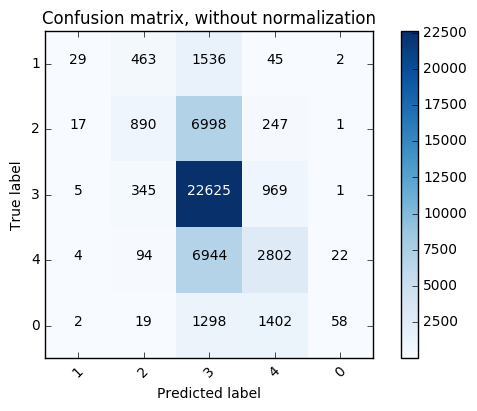

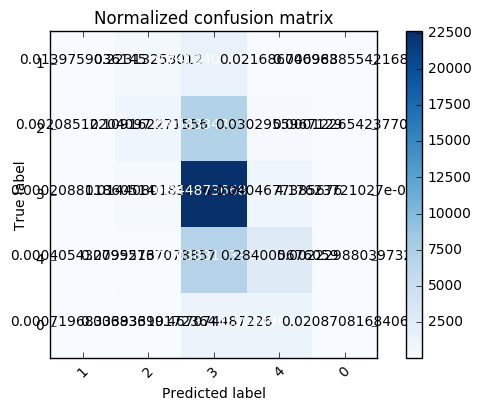

In [11]:
import itertools
class_names = target
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()




In [17]:
resultsthird = pd.DataFrame({
    "PhraseId": movies_test["PhraseId"],
    "Sentiment": prediction
    }
)
resultsthird.to_csv("first_submission_multi_sklearn.csv", index= False)

